# Installation

In [ ]:
!pip install pandas matplotlib scikit-learn

# 1.Importing

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2.Load Dataset

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The dataset contains 150 samples of iris flowers, with three species:

- Iris setosa
- Iris versicolor
- Iris virginica

The target variable consists of three classes corresponding to the three iris species, making it a multiclass classification problem.

# 3.Extract Features

In [6]:
X = df
y = iris.target

# 4. Preprocess Data

In [7]:
y = np.array([['Setosa', 'Versicolor', 'Virginica'][i] for i in y])

# 5.Split the Data into Training and Test Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6.Create Model

In [9]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# 7.Train the model

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# 8. Make Predictions

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa'], dtype='<U10')

## 8.1 Custom Prediction

In [13]:
new_data=pd.DataFrame([{
    'sepal_length': 5.5,
    'sepal_width': 2.4,
    'petal_length': 3.8,
    'petal_width': 1.1
} ])
prediction = model.predict(new_data)
print(f"Predicted Flower: {prediction[0]}")

Predicted Flower: Versicolor


## 8.2 Why Decision Tree Classifier used for?

Decision Tree Classification is used when the target variable is categorical. It predicts class labels by learning decision rules inferred from the features in the dataset.

Decision trees can easily handle multiple classes, making them suitable for problems where the output can belong to more than two categories.

# 9.Evaluation Metrics

In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [15]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Model Accuracy: 100.00%
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# 10. Visualization

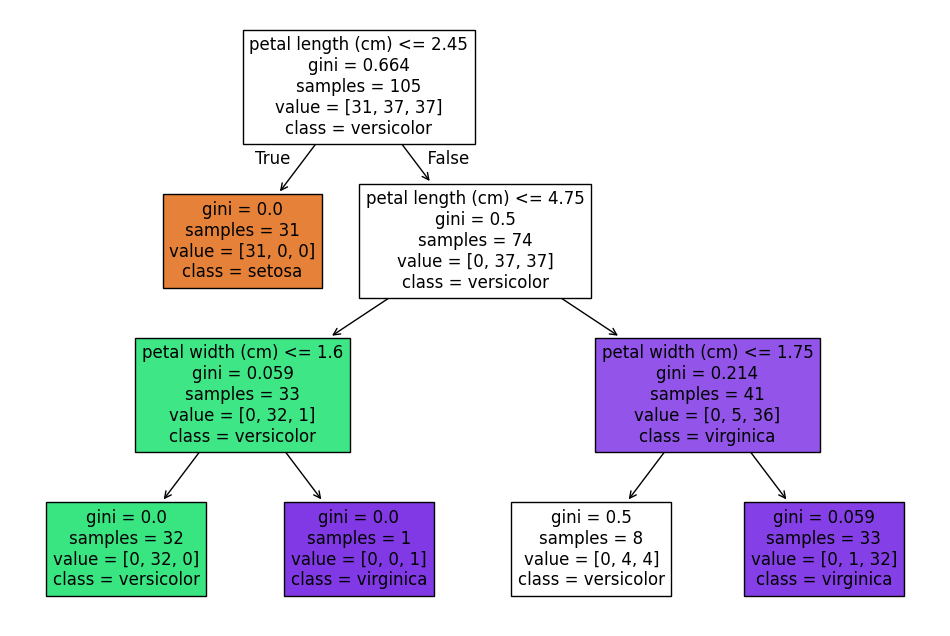

In [16]:
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# 11.Tree Rules

In [17]:
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

|--- petal_length <= 2.45
|   |--- class: Setosa
|--- petal_length >  2.45
|   |--- petal_length <= 4.75
|   |   |--- petal_width <= 1.60
|   |   |   |--- class: Versicolor
|   |   |--- petal_width >  1.60
|   |   |   |--- class: Virginica
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- class: Versicolor
|   |   |--- petal_width >  1.75
|   |   |   |--- class: Virginica



# 12. Regression

[1 0 2 2 2 0 1 2 2 1 2 0 0 0 0 1 2 1 2 2 0 2 0 2 2 2 2 2 0 0]
Predicted sepal width: 1.9000000000000001
Mean Absolute Error (MAE): 0.18944444444444442
Mean Squared Error (MSE): 0.05139254667891029
Root Mean Squared Error (RMSE): 0.2266992427841573
R² Score: 0.9191503224824429


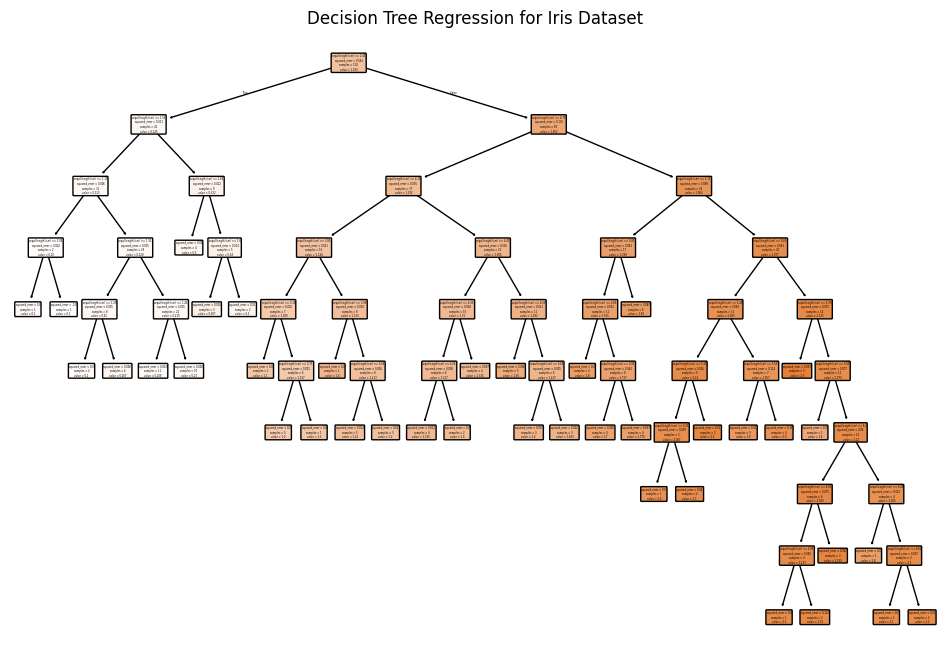

In [18]:
# Step 3: Extract Features
X = df[['petal_length']].values  # Features
y = df['petal_width'].values    # Target

# Step 5: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create the Model (Decision Tree Regressor)
regressor = DecisionTreeRegressor(random_state=42)

# Step 7: Train the Model
regressor.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = regressor.predict(X_test)
# Since this is a regression, we need to round predictions to get integer values.
y_pred_rounded = np.round(y_pred).astype(int)
print(y_pred_rounded)

# Step 8.1 Custom Predictions
prediction = regressor.predict(np.array([[5.5]]))
print(f"Predicted sepal width: {prediction[0]}")

# Step 9: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Step 10: Visualization - Plot the Decision Tree Diagram
plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=iris.feature_names, filled=True, rounded=True)
plt.title("Decision Tree Regression for Iris Dataset")
plt.show()

## 12.1 Why Decision Tree Regression used for?

Decision Tree Regression is used when the target variable is continuous. It predicts a numerical value by creating a model that predicts the output based on the average of the target variable in the leaf nodes of the tree.

It allow to see which features lead to particular predictions through the structure of the tree.